# Lab2

## Lab Book 01

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import math
# from sympy import *
import scipy.optimize as optimize

In [2]:
e1 = 9.55213728e-1
e2 = 9.06436704e-1
e3 = 7.33394145e-1
e4 = 3.89531478e-1
e5 = 5.83960912e-2
e6 = 1.97897053e-4
e7 = 7.63529928e-12
err = np.array([e1, e2, e3, e4, e5, e6, e7])
def orderCon(error):
    x = np.log(error[0:len(error) - 1])
    y = np.log(error[1:len(error)])
    slope = np.polyfit(x, y, 1)[0]
    return slope
print(orderCon(err))

3.0020757470700277


The order of convergence is the slope of the fitted line, which is approximately 3.

## Lab Book 02

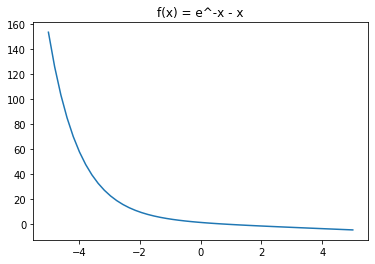

 k            xk                      f(xk)          
 0   1.000000000000000e+00   -6.321205588285577e-01  
 1   5.378828427399902e-01    4.610048629168972e-02  
 2   5.669869914054133e-01    2.449498638371628e-04  
 3   5.671432859891230e-01    6.927808993140161e-09  
 4   5.671432904097838e-01    0.000000000000000e+00  
 5   5.671432904097838e-01    0.000000000000000e+00  
 6   5.671432904097838e-01    0.000000000000000e+00  
 7   5.671432904097838e-01    0.000000000000000e+00  
 8   5.671432904097838e-01    0.000000000000000e+00  
 9   5.671432904097838e-01    0.000000000000000e+00  
 k            xk                      f(xk)          
 0   1.000000000000000e+00   -6.321205588285577e-01  
 1   6.126998367802821e-01   -7.081394787317097e-02  
 2   5.638383891610742e-01    5.182354507338394e-03  
 3   5.671703584197446e-01   -4.241924243009176e-05  
 4   5.671433066049633e-01   -2.538016663500287e-08  
 5   5.671432904097046e-01    1.242339564555550e-13  
 6   5.671432904097838e-01  

0.5671432904097838

In [3]:
def newton(f, df, x0, niters):
    """
    Newton's method for 1D rootfinding.
    - The function f(x) is the one we want the root of
    - The function df(x) is the derivative f'(x)
    - x0 is the starting point
    - niters is the number of iterations to run
    """
    x = x0  # initial guess
    print("{0:^3}{1:^25}{2:^25}".format("k", "xk", "f(xk)"))
    for i in range(niters):
        print("{0:^3}{1:^25.15e}{2:^25.15e}".format(i, x, f(x)))
        ############
        # TODO Add code here to calculate the new value of x
        x = x - f(x) / df(x)
        ############
    return x

def secant(f, x1, x2, niters):
    """
    Secant method for 1D rootfinding.
    - The function f(x) is the one we want the root of
    - x1 and x2 are the two starting points
    - niters is the number of iterations to run
    """
    f1 = f(x1)
    f2 = f(x2)
    print("{0:^3}{1:^25}{2:^25}".format("k", "xk", "f(xk)"))
    for i in range(niters):
        print("{0:^3}{1:^25.15e}{2:^25.15e}".format(i, x2, f2))
        if f1 == f2:
            print('Secant method error: division by zero')
            return x2
        ############
        # TODO add code here to calculate the new iterate x3
        dx = -f2 * (x2 - x1) / (f2 - f1)
        x3 = x2 + dx
        ############
        # Update x1 and x2 (don't need to modify this)
        x1 = x2
        f1 = f2
        x2 = x3
        f2 = f(x3)
    return x2

def f(x):
    return (np.exp(-x) - x)

def df(x):
    return (-np.exp(-x) - 1)

plt.figure()
plt.clf()
x = np.linspace(-5,5,50)
plt.plot(x,f(x))
plt.title('f(x) = e^-x - x')
plt.show()

newton(f,df,1,10)
secant(f,0,1,10)

Both Newton's Method and Secant Method returns the root around x = 0.5671432904097838. Newton's Method has an order of convergence about 2 as the number of f(xk)'s accurate decimal places is roughly doubled after each iteration, the accurate result is being found at around 5th iteration with an accuracy of 16 digits.
Secant Method has an order around 1.62 and is obviously less than Newton's Method. The accurate result is being found ar around 8th iteration with an acuuracy of 16 digits.

## Lab Book 03

In [4]:
def f2(x):
    return pow(x,4)
def df2(x):
    return 4*pow(x,3)
newton(f2,df2,1.0,20)

 k            xk                      f(xk)          
 0   1.000000000000000e+00    1.000000000000000e+00  
 1   7.500000000000000e-01    3.164062500000000e-01  
 2   5.625000000000000e-01    1.001129150390625e-01  
 3   4.218750000000000e-01    3.167635202407837e-02  
 4   3.164062500000000e-01    1.002259575761855e-02  
 5   2.373046875000000e-01    3.171211938933993e-03  
 6   1.779785156250000e-01    1.003391277553334e-03  
 7   1.334838867187500e-01    3.174792714133595e-04  
 8   1.001129150390625e-01    1.004524257206333e-04  
 9   7.508468627929688e-02    3.178377532566913e-05  
10   5.631351470947266e-02    1.005658516163750e-05  
11   4.223513603210449e-02    3.181966398799364e-06  
12   3.167635202407837e-02    1.006794055870111e-06  
13   2.375726401805878e-02    3.185559317401524e-07  
14   1.781794801354408e-02    1.007930877771576e-07  
15   1.336346101015806e-02    3.189156292949127e-08  
16   1.002259575761855e-02    1.009068983315935e-08  
17   7.516946818213910e-03  

0.0031712119389339932

There is an root of f(x) = x^4 at x = 0. However, Newton's Method converges really slow around the root and has an order of convergence even less than 1 because it takes around 2 iterations to get one more accurate decimal. The reason of the slow convergence is because of the function is relly flat around x = 0 and the derivative is really small and doesn't change much after each iteration.

## Lab Book 04

In [5]:
# Example code to find a root of f(x) in the interval [-1,1]
# Using Brent's method, but other algorithms are available (check documentation)
soln = optimize.root_scalar(f, bracket=(-1, 1), method='brentq')
print("Root is x =", soln.root)
print('it takes',soln.iterations,'iterations')
print('the number of function calls is',soln.function_calls)

Root is x = 0.567143290409784
it takes 7 iterations
the number of function calls is 8


In [6]:
secant(f,0.0,0.1,10)

 k            xk                      f(xk)          
 0   1.000000000000000e-01    8.048374180359595e-01  
 1   5.123933030278593e-01    8.666682631537515e-02  
 2   5.621597779840559e-01    7.816932388359010e-03  
 3   5.670934709868598e-01    7.807487819688763e-05  
 4   5.671432454503060e-01    7.045794458981902e-08  
 5   5.671432904093786e-01    6.351585923880521e-13  
 6   5.671432904097840e-01   -1.110223024625157e-16  
 7   5.671432904097838e-01    0.000000000000000e+00  
 8   5.671432904097838e-01    0.000000000000000e+00  
Secant method error: division by zero


0.5671432904097838

Brent's Method is a method that combines Secant Method and Bisection Method. Because of Secant Method may not work if the starting point is far away from root r, therefore Bisection Method can be used in this situation. Thus, Brent's Method has an order of convergence between 1 and 1.62, which is the order of convergence of Bisection Method and Secant Method respectively. It does have a less number of iterations(7 iterations) than Secant Method(8 iterations) and thus call less times of the given function.

## Lab Book 05

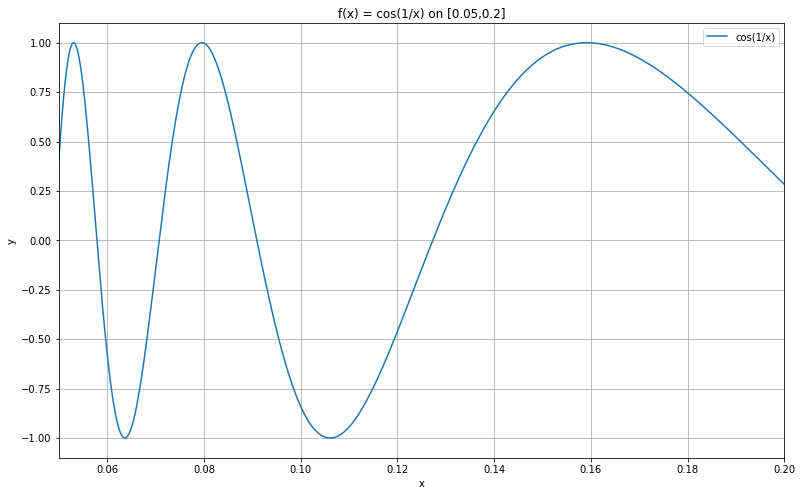

In [7]:
x0 = np.linspace(0.05,0.2,1600)
def f3(x):
    return np.cos(1/x)

plt.figure(figsize = (13,8))
plt.clf()
plt.plot(x0,f3(x0),label = "cos(1/x)")
plt.legend(loc = 'best')
plt.title('f(x) = cos(1/x) on [0.05,0.2]')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0.05,0.2)
plt.grid()
plt.show()

In [8]:
def df3(x):
    return np.sin(1/x)*pow(x,-2)
for i in np.linspace(5,20,16):
    print("x = ",i/100)
    newton(f3,df3,i/100,10)

x =  0.05
 k            xk                      f(xk)          
 0   5.000000000000000e-02    4.080820618133920e-01  
 1   4.888251222762771e-02   -3.685312839673568e-02  
 2   4.897063263882934e-02   -4.965611485208414e-05  
 3   4.897075172029371e-02   -1.207079802873458e-10  
 4   4.897075172058318e-02    2.572377258846030e-15  
 5   4.897075172058318e-02   -9.803364199544708e-16  
 6   4.897075172058318e-02   -9.803364199544708e-16  
 7   4.897075172058318e-02   -9.803364199544708e-16  
 8   4.897075172058318e-02   -9.803364199544708e-16  
 9   4.897075172058318e-02   -9.803364199544708e-16  
x =  0.06
 k            xk                      f(xk)          
 0   6.000000000000000e-02   -5.745816685191187e-01  
 1   5.747266057930107e-02    1.205239853450934e-01  
 2   5.787368748402621e-02    2.499771943416221e-04  
 3   5.787452474859368e-02    3.611188896040978e-09  
 4   5.787452476068921e-02    1.102801099869206e-15  
 5   5.787452476068922e-02   -2.449912578931295e-15  
 6   5.7

### The roots are too long and jupyter can't show them at one time, therefore the above cell didn't run in last submission but the results are attached below
x =  0.05
 k            xk                      f(xk)          
 0   5.000000000000000e-02    4.080820618133920e-01  
 1   4.888251222762771e-02   -3.685312839673568e-02  
 2   4.897063263882934e-02   -4.965611485208414e-05  
 3   4.897075172029371e-02   -1.207079802873458e-10  
 4   4.897075172058318e-02    2.572377258846030e-15  
 5   4.897075172058318e-02   -9.803364199544708e-16  
 6   4.897075172058318e-02   -9.803364199544708e-16  
 7   4.897075172058318e-02   -9.803364199544708e-16  
 8   4.897075172058318e-02   -9.803364199544708e-16  
 9   4.897075172058318e-02   -9.803364199544708e-16  
x =  0.06
 k            xk                      f(xk)          
 0   6.000000000000000e-02   -5.745816685191187e-01  
 1   5.747266057930107e-02    1.205239853450934e-01  
 2   5.787368748402621e-02    2.499771943416221e-04  
 3   5.787452474859368e-02    3.611188896040978e-09  
 4   5.787452476068921e-02    1.102801099869206e-15  
 5   5.787452476068922e-02   -2.449912578931295e-15  
 6   5.787452476068921e-02    1.102801099869206e-15  
 7   5.787452476068922e-02   -2.449912578931295e-15  
 8   5.787452476068921e-02    1.102801099869206e-15  
 9   5.787452476068922e-02   -2.449912578931295e-15  
x =  0.07
 k            xk                      f(xk)          
 0   7.000000000000001e-02   -1.480016316209667e-01  
 1   7.073328356121376e-02   -4.490389314010012e-04  
 2   7.073553019185586e-02   -1.423174234418545e-08  
 3   7.073553026306459e-02   -1.225265779783942e-15  
 4   7.073553026306459e-02   -1.225265779783942e-15  
 5   7.073553026306459e-02   -1.225265779783942e-15  
 6   7.073553026306459e-02   -1.225265779783942e-15  
 7   7.073553026306459e-02   -1.225265779783942e-15  
 8   7.073553026306459e-02   -1.225265779783942e-15  
 9   7.073553026306459e-02   -1.225265779783942e-15  
x =  0.08
 k            xk                      f(xk)          
 0   8.000000000000000e-02    9.977982791785807e-01  
 1   1.762865846995752e-01    8.193019049584002e-01  
 2   2.206937773295009e-01   -1.802332858538964e-01  
 3   2.117692318526106e-01    9.732164014717036e-03  
 4   2.122057031707007e-01    1.971108006535980e-05  
 5   2.122065907854812e-01    8.244408993322455e-11  
 6   2.122065907891938e-01    7.044813998280222e-16  
 7   2.122065907891938e-01   -1.836970198721030e-16  
 8   2.122065907891938e-01   -1.836970198721030e-16  
 9   2.122065907891938e-01   -1.836970198721030e-16  
x =  0.09
 k            xk                      f(xk)          
 0   9.000000000000000e-02    1.152799495457504e-01  
 1   9.094003476317759e-02    6.827800664496918e-04  
 2   9.094568141704078e-02    4.228649565388450e-08  
 3   9.094568176679733e-02   -4.286263797015736e-16  
 4   9.094568176679733e-02   -4.286263797015736e-16  
 5   9.094568176679733e-02   -4.286263797015736e-16  
 6   9.094568176679733e-02   -4.286263797015736e-16  
 7   9.094568176679733e-02   -4.286263797015736e-16  
 8   9.094568176679733e-02   -4.286263797015736e-16  
 9   9.094568176679733e-02   -4.286263797015736e-16  
x =  0.1
 k            xk                      f(xk)          
 0   1.000000000000000e-01   -8.390715290764524e-01  
 1   8.457648954643081e-02    7.366088757789258e-01  
 2   9.236733666015084e-02   -1.684296694806481e-01  
 3   9.090951412981260e-02    4.374489014864390e-03  
 4   9.094566761412363e-02    1.711096076843139e-06  
 5   9.094568176679513e-02    2.660248995303360e-13  
 6   9.094568176679733e-02   -4.286263797015736e-16  
 7   9.094568176679733e-02   -4.286263797015736e-16  
 8   9.094568176679733e-02   -4.286263797015736e-16  
 9   9.094568176679733e-02   -4.286263797015736e-16  
x =  0.11
 k            xk                      f(xk)          
 0   1.100000000000000e-01   -9.447815861050272e-01  
 1   1.448850548210958e-01    8.145531709443161e-01  
 2   1.154088162860021e-01   -7.248851499960480e-01  
 3   1.294243637965092e-01    1.271162852806458e-01  
 4   1.272776669774745e-01   -2.856279959492302e-03  
 5   1.273239377719383e-01   -1.030237430170799e-06  
 6   1.273239544735141e-01   -1.346969580946322e-13  
 7   1.273239544735163e-01    3.061616997868383e-16  
 8   1.273239544735163e-01    3.061616997868383e-16  
 9   1.273239544735163e-01    3.061616997868383e-16  
x =  0.12
 k            xk                      f(xk)          
 0   1.200000000000000e-01   -4.612040391631892e-01  
 1   1.274849343677160e-01    9.917347589756634e-03  
 2   1.273237456565879e-01   -1.288089909246382e-05  
 3   1.273239544731738e-01   -2.112590572928739e-11  
 4   1.273239544735163e-01    3.061616997868383e-16  
 5   1.273239544735163e-01    3.061616997868383e-16  
 6   1.273239544735163e-01    3.061616997868383e-16  
 7   1.273239544735163e-01    3.061616997868383e-16  
 8   1.273239544735163e-01    3.061616997868383e-16  
 9   1.273239544735163e-01    3.061616997868383e-16  
x =  0.13
 k            xk                      f(xk)          
 0   1.300000000000000e-01    1.609705435155296e-01  
 1   1.272436528732162e-01   -4.956512150711360e-03  
 2   1.273239044855045e-01   -3.083513090773407e-06  
 3   1.273239544734966e-01   -1.210281024351484e-12  
 4   1.273239544735163e-01    3.061616997868383e-16  
 5   1.273239544735163e-01    3.061616997868383e-16  
 6   1.273239544735163e-01    3.061616997868383e-16  
 7   1.273239544735163e-01    3.061616997868383e-16  
 8   1.273239544735163e-01    3.061616997868383e-16  
 9   1.273239544735163e-01    3.061616997868383e-16  
x =  0.14
 k            xk                      f(xk)          
 0   1.400000000000000e-01    6.526861299196702e-01  
 1   1.231148781031472e-01   -2.652985102973746e-01  
 2   1.272855298906745e-01   -2.370934743732119e-03  
 3   1.273239429494940e-01   -7.108596943574466e-07  
 4   1.273239544735152e-01   -6.453086293832230e-14  
 5   1.273239544735163e-01    3.061616997868383e-16  
 6   1.273239544735163e-01    3.061616997868383e-16  
 7   1.273239544735163e-01    3.061616997868383e-16  
 8   1.273239544735163e-01    3.061616997868383e-16  
 9   1.273239544735163e-01    3.061616997868383e-16  
x =  0.15
 k            xk                      f(xk)          
 0   1.500000000000000e-01    9.273677030509753e-01  
 1   9.423171270400212e-02   -3.741088334939776e-01  
 2   9.064965848265227e-02    3.589916030087891e-02  
 3   9.094484509962890e-02    1.011562115345326e-04  
 4   9.094568175910316e-02    9.302474501012617e-10  
 5   9.094568176679733e-02   -4.286263797015736e-16  
 6   9.094568176679733e-02   -4.286263797015736e-16  
 7   9.094568176679733e-02   -4.286263797015736e-16  
 8   9.094568176679733e-02   -4.286263797015736e-16  
 9   9.094568176679733e-02   -4.286263797015736e-16  
x =  0.16
 k            xk                      f(xk)          
 0   1.600000000000000e-01    9.994494182244994e-01  
 1   9.311425334553667e-01    4.766560450054589e-01  
 2   4.610274824622227e-01   -5.632152540167110e-01  
 3   6.058996357053594e-01   -7.955786517091588e-02  
 4   6.351993439086878e-01   -3.512596854611498e-03  
 5   6.366166089311246e-01   -7.805505380346584e-06  
 6   6.366197723518620e-01   -3.878602422214973e-11  
 7   6.366197723675814e-01    6.123233995736766e-17  
 8   6.366197723675814e-01    6.123233995736766e-17  
 9   6.366197723675814e-01    6.123233995736766e-17  
x =  0.17
 k            xk                      f(xk)          
 0   1.700000000000000e-01    9.207365363804039e-01  
 1   2.381966117596715e-01   -4.918179531934913e-01  
 2   2.061480928796590e-01    1.380503695470452e-01  
 3   2.120715401989906e-01    3.000921091370821e-03  
 4   2.122065052466696e-01    1.899610229820227e-06  
 5   2.122065907891593e-01    7.654261007616358e-13  
 6   2.122065907891938e-01    7.044813998280222e-16  
 7   2.122065907891938e-01   -1.836970198721030e-16  
 8   2.122065907891938e-01   -1.836970198721030e-16  
 9   2.122065907891938e-01   -1.836970198721030e-16  
x =  0.18
 k            xk                      f(xk)          
 0   1.800000000000000e-01    7.467529543114477e-01  
 1   2.163775982685309e-01   -9.071359267696939e-02  
 2   2.121128711573614e-01    2.082113352106412e-03  
 3   2.122065495339123e-01    9.161401209150378e-07  
 4   2.122065907891857e-01    1.783401653398531e-13  
 5   2.122065907891938e-01    7.044813998280222e-16  
 6   2.122065907891938e-01   -1.836970198721030e-16  
 7   2.122065907891938e-01   -1.836970198721030e-16  
 8   2.122065907891938e-01   -1.836970198721030e-16  
 9   2.122065907891938e-01   -1.836970198721030e-16  
x =  0.19
 k            xk                      f(xk)          
 0   1.900000000000000e-01    5.233425926926495e-01  
 1   2.121713081331028e-01    7.836383920515344e-04  
 2   2.122065849301228e-01    1.301101065049216e-07  
 3   2.122065907891936e-01    4.257195078628523e-15  
 4   2.122065907891938e-01   -1.836970198721030e-16  
 5   2.122065907891938e-01   -1.836970198721030e-16  
 6   2.122065907891938e-01   -1.836970198721030e-16  
 7   2.122065907891938e-01   -1.836970198721030e-16  
 8   2.122065907891938e-01   -1.836970198721030e-16  
 9   2.122065907891938e-01   -1.836970198721030e-16  
x =  0.2
 k            xk                      f(xk)          
 0   2.000000000000000e-01    2.836621854632263e-01  
 1   2.118325166213098e-01    8.321492231970928e-03  
 2   2.122059399973655e-01    1.445192457814206e-05  
 3   2.122065907871980e-01    4.431991944601637e-11  
 4   2.122065907891938e-01   -1.836970198721030e-16  
 5   2.122065907891938e-01   -1.836970198721030e-16  
 6   2.122065907891938e-01   -1.836970198721030e-16  
 7   2.122065907891938e-01   -1.836970198721030e-16  
 8   2.122065907891938e-01   -1.836970198721030e-16  
 9   2.122065907891938e-01   -1.836970198721030e-16  

We can find multiple solutions with different starting points. There are multiple root on [0.05,0.2] and therefore each starting point will only return the it's closest root.

## Lab Book 06

In [9]:
def newton_multi(f, J, x0, niters):
    """
    Multidimensional Newton's method
    - The function f(x) is the one we want the root of
    - The matrix J is the Jacobian of f(x)
    - x0 is the starting point
    - niters is the number of iterations
    """
    x = x0
    print("{0:^3}{1:^15}{2:^15}{3:^15}{4:^15}{5:^15}".format("k", "x1k", "x2k", "f(x1k)", "f(x2k)","error"))
    for i in range(niters): 
        print("{0:^3}{1:^25.15e}{2:^25.15e}{3:^25.15e}{4:^25.15e}{5:^25.15e}".format(i, x[0], x[1], f(x)[0], f(x)[1],error(x)))
        x = x - np.linalg.inv(J(x))@f(x)
    return x 

def f4(x): 
    return np.array([x[0]+x[1]-x[0]*x[1]+2, x[0]*np.exp(-x[1])-1]) 

def J(x): 
    return np.array([[1-x[1], 1-x[0]], 
                     [np.exp(-x[1]), -x[0]*np.exp(-x[1])]]) 

def error(x): 
    return np.sqrt(pow(f4(x)[0],2) + pow(f4(x)[1],2))  

In [10]:
x0 = np.array([0.1,-1])
newton_multi(f4,J,x0,10)

 k       x1k            x2k          f(x1k)         f(x2k)          error     
 0   1.000000000000000e-01   -1.000000000000000e+00    1.200000000000000e+00   -7.281718171540954e-01    1.403650310902789e+00  
 1   2.100831791402710e-01   -2.577962620311713e+00    1.737071418084257e-01    1.766853861884913e+00    1.775372282191226e+00  
 2   1.176693278618611e-01   -2.379275670597244e+00    1.836142622187387e-02    2.704850745537877e-01    2.711075755659907e-01  
 3   9.871224876096293e-02   -2.327481290766114e+00    9.818701554404896e-04    1.200655836807640e-02    1.204663906856059e-02  
 4   9.777510733144483e-02   -2.325110848679060e+00    2.221439486582710e-06    2.558840442046240e-05    2.568464977720522e-05  
 5   9.777309123777775e-02   -2.325105880632319e+00    1.001598803895831e-11    1.147830719361309e-10    1.152192415332246e-10  
 6   9.777309122872990e-02   -2.325105880610075e+00    0.000000000000000e+00    0.000000000000000e+00    0.000000000000000e+00  
 7   9.77730912287

array([ 0.09777309, -2.32510588])

The solution found by the algorithm and the API are both at (0.09777309,-2.32510588). The quadratic convergence rate is observed as the accurate number of decimal of the error is roughly doubling after each iteration.

## Lab Book 07

In [11]:
# a)
def polyfit(x, y): 
    V = np.zeros([len(x),len(y)]) 
    for i in range(len(x)):
        for j in range(len(x)):
            V[i,j] = pow(x[i],j)
    a = np.flip(np.linalg.solve(V, y))
    return np.poly1d(a)

In [12]:
# b)
x = np.linspace(0.0,6.0,11)
y = np.sin(x)
polyfit(x,y)

poly1d([-3.34568332e-08, -1.27253778e-06,  5.13729692e-05, -5.18769514e-04,
        1.20748275e-03,  5.43100710e-03,  4.44155295e-03, -1.70805212e-01,
        2.10279698e-03,  9.99564646e-01,  0.00000000e+00])

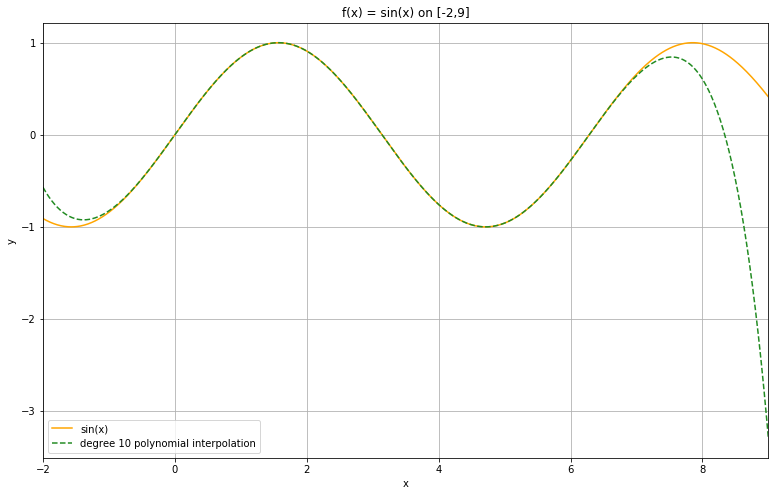

In [13]:
# c)
xs = np.linspace(-2,9,1000)

plt.figure(figsize = (13,8))
plt.clf()
plt.plot(xs,np.sin(xs),color='orange',label = "sin(x)")
plt.plot(xs,polyfit(x,y)(xs),color='forestgreen',linestyle='--',label = "degree 10 polynomial interpolation")
plt.legend(loc = 'best')
plt.title('f(x) = sin(x) on [-2,9]')
plt.xlabel('x')
plt.ylabel('y')
plt. xlim(-2,9)
plt.grid()
plt.show()

The interpolation on [0,6] is perfect, the interpolation is almost the same as the original function. As the x is out of [0,6], the bigger or small x is, the poorer interpolation it is and the error is significantly big around x = 9.

## Lab Book 08

In [14]:
x = np.linspace(-1, 1, 11)
xs = np.linspace(-1,1,1000)
def f5(x):
    return 1 / (1 + 25*pow(x,2))
fx = f5(x)
p = interpolate.BarycentricInterpolator(x, fx)

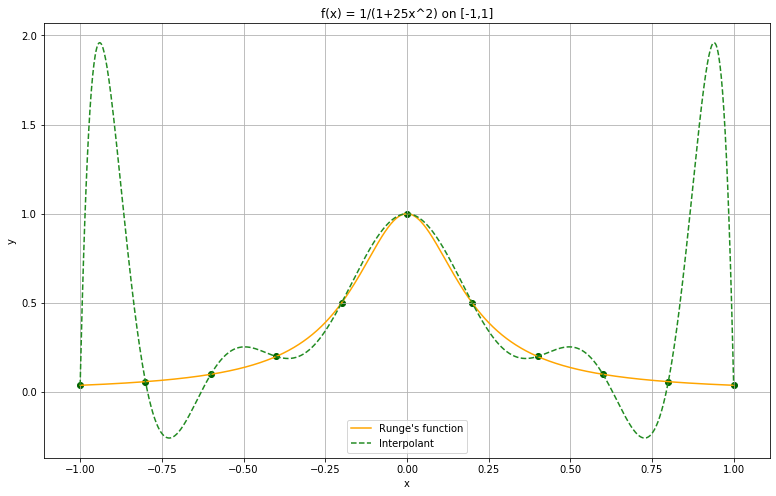

In [15]:
plt.figure(figsize = (13,8))
plt.clf()
plt.plot(xs,f5(xs),color='orange',label = "Runge's function")
plt.plot(xs,p(xs),color='forestgreen',linestyle='--',label = "Interpolant")
plt.scatter(x,p(x),color='darkgreen')
plt.legend(loc = 'best')
plt.title('f(x) = 1/(1+25x^2) on [-1,1]')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

The interpotation is relatively accurate on [-0.25,0.25] and has a huge difference around +/-1. This indicates that this interpolation is not quite a good choice for the function.

## Lab Book 09

In [16]:
def chebyshev_points(n):
    '''
    Returns a vector of the Chebyshev points for interpolation to polynomials of degree n
    The vector has length n+1.
    '''
    result = np.zeros((n+1,))
    for i in range(0,n+1):
        result[i] = np.cos((2*i+1)/(2*n+2)*np.pi)
    return result

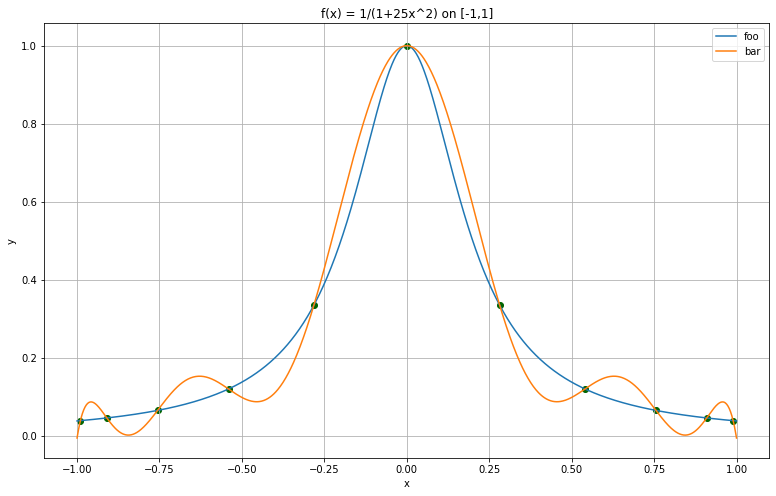

In [18]:
x = chebyshev_points(10)
fx = f5(x)
p = interpolate.BarycentricInterpolator(x, fx)
plt.figure(figsize = (13,8))
plt.clf()
plt.plot(xs,f5(xs),color='orange',label = "Runge's function")
plt.plot(xs,p(xs),color='forestgreen',linestyle='--',label = "Interpolant")
plt.scatter(x,p(x),color='darkgreen')
plt.legend(loc = 'best')
plt.title('f(x) = 1/(1+25x^2) on [-1,1]')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

The chebyshev points interpolation doesn't really fit the function better on [-0.25,0.25] than the previous method, but it still does fit the whole function better than the equally spaced interpolation. We can find some oscillation on [-1,1] but the difference near +/-1 is much smaller than the previous method and is a reasonable error. Overall this is a better interpolation than equally spaced interpolation.

## Lab Book 10

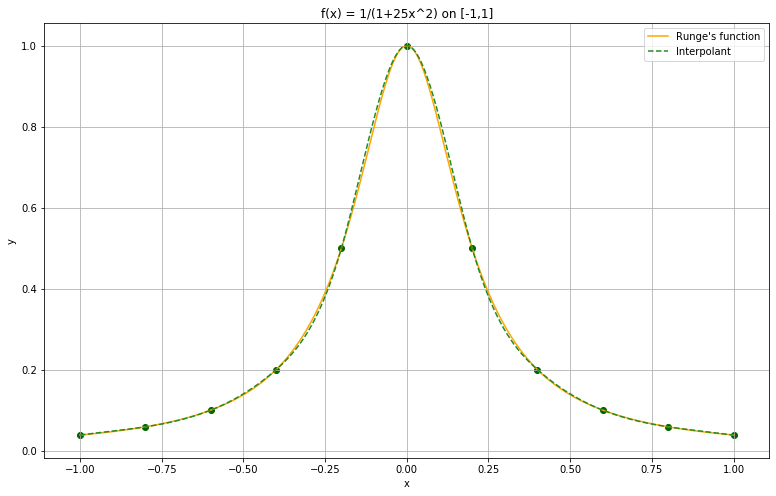

In [ ]:
x = np.linspace(-1,1,11)
fx = f5(x)
cs = interpolate.CubicSpline(x, fx, bc_type='not-a-knot')
plt.figure(figsize = (13,8))
plt.clf()
plt.plot(xs,f5(xs),color='orange',label = "Runge's function")
plt.plot(xs,cs(xs),color='forestgreen',linestyle='--',label = "Interpolant")
plt.scatter(x,cs(x),color='darkgreen')
plt.legend(loc = 'best')
plt.title('f(x) = 1/(1+25x^2) on [-1,1]')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

The cubic spline interpolation is quite percise and is almost the same as the Runge's function. The cubic spline interpolation fits the function better on the whole interval than the equally spaced interpolation